# Histogram-Based Approach

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils.edge_extraction import extract_working_region
import cv2
from utils.image_conversion import *

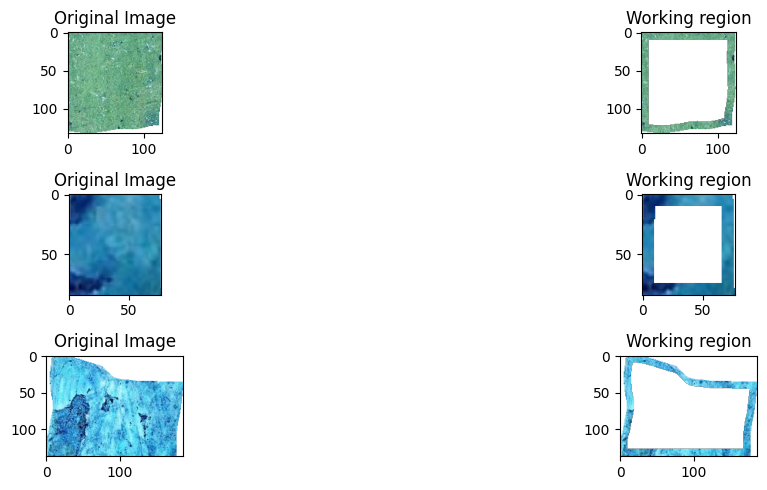

In [2]:
image_green1 = cv2.imread("./data/5.34.1.png", cv2.IMREAD_UNCHANGED)
image_green2 = cv2.imread("./data/5.38.15.png", cv2.IMREAD_UNCHANGED)
image_yellow = cv2.imread("./data/5.34.34.png", cv2.IMREAD_UNCHANGED)

working_region_image_green1 = extract_working_region(image_green1, threshold=10)
working_region_image_green2 = extract_working_region(image_green2, threshold=10)
working_region_image_yellow = extract_working_region(image_yellow, threshold=10)

fig, axes = plt.subplots(3, 2, figsize=(15, 5))
images = [image_green1, working_region_image_green1, image_green2, working_region_image_green2, image_yellow, working_region_image_yellow]
titles = ["Original Image", "Working region"]

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.imshow(images[i * 2 + j])
        ax.set_title(titles[j])

plt.tight_layout()
plt.show()

In [3]:
def get_only_valid_pixels(input_image: np.ndarray) -> np.ndarray:
    # Extract pixels with alpha channel value different from 0
    valid_pixels = input_image[input_image[:, :, 3] != 0]

    # Reshape to (num_pixels, 4)
    reshaped_image = valid_pixels.reshape((-1, 4))

    # Determine the dimensions of the reshaped image
    num_pixels = reshaped_image.shape[0]
    width = int(np.sqrt(num_pixels))
    height = (num_pixels + width - 1) // width

    # Pad the reshaped image to make it rectangular
    padded_image = np.zeros((height * width, 4), dtype=np.uint8)
    padded_image[:num_pixels, :] = reshaped_image

    # Reshape the padded image to the desired dimensions
    final_image = padded_image.reshape((height, width, 4))

    # Split channel
    b, g, r, a = cv2.split(final_image)
    rgb_image = cv2.merge((b, g, r))

    return rgb_image

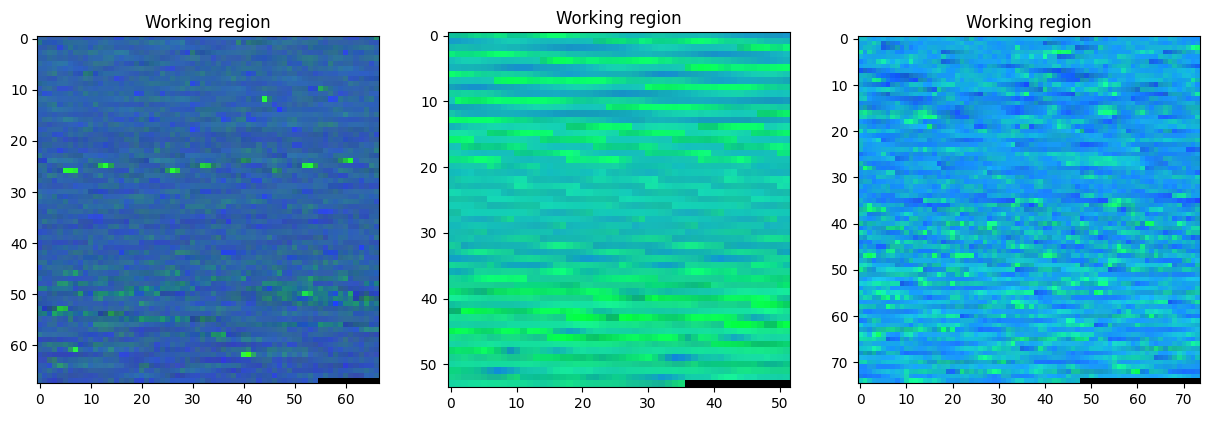

In [4]:
working_region_image_green1 = get_only_valid_pixels(working_region_image_green1)
working_region_image_green2 = get_only_valid_pixels(working_region_image_green2)
working_region_image_yellow = get_only_valid_pixels(working_region_image_yellow)

working_region_image_green1 = cv.cvtColor(working_region_image_green1, cv.COLOR_BGR2HSV)
working_region_image_green2 = cv.cvtColor(working_region_image_green2, cv.COLOR_BGR2HSV)
working_region_image_yellow = cv.cvtColor(working_region_image_yellow, cv.COLOR_BGR2HSV)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
images = [working_region_image_green1, working_region_image_green2,working_region_image_yellow]
titles = ["Working region"]

for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.set_title(titles[0])

plt.show()

In [5]:
hist_img_green1 = cv2.calcHist([working_region_image_green1], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green1, hist_img_green1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_green2 = cv2.calcHist([working_region_image_green2], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green2, hist_img_green2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_yellow = cv2.calcHist([working_region_image_yellow], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_yellow, hist_img_yellow, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cp_green_green = cv2.compareHist(hist_img_green1, hist_img_green2, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green-Green): ", round(cp_green_green, 2))

cp_green_yellow = cv2.compareHist(hist_img_green1, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green1-Yellow): ", round(cp_green_yellow, 2))

cp_green2_yellow = cv2.compareHist(hist_img_green2, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green2-Yellow): ", round(cp_green2_yellow, 2))

cp_yellow_yellow = cv2.compareHist(hist_img_yellow, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Yellow-Yellow): ", round(cp_yellow_yellow, 2))

Similarity Score (Green-Green):  -0.08
Similarity Score (Green1-Yellow):  -0.08
Similarity Score (Green2-Yellow):  0.13
Similarity Score (Yellow-Yellow):  1.0


In [6]:
hist_img_green1

array([[[8.3507309e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 5.5671539e-03, 2.0876827e-03, 6.9589424e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3917885e-03,
         1.9485038e-02, 4.1753654e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5309673e-02,
         4.8712594e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 6.9589424e-04, 2.0876827e-03,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0

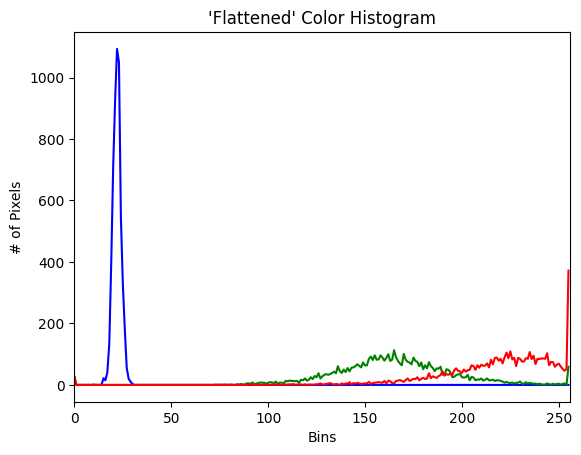

In [7]:
chans = cv2.split(working_region_image_yellow)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

In [8]:
hist = cv2.calcHist([working_region_image_green1], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


In [9]:
hist = cv2.calcHist([working_region_image_yellow], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


In [10]:
def plot_histogram(image, title, mask=None):
    # split the image into its respective channels, then initialize
    # the tuple of channel names along with our figure for plotting
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.ylim([0, 256])
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

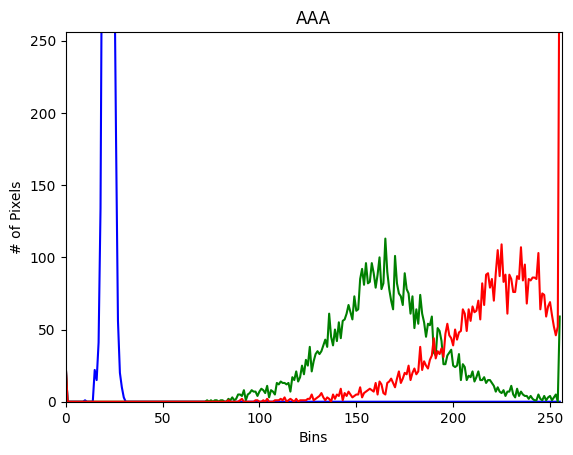

In [11]:
plot_histogram(working_region_image_yellow, "AAA")

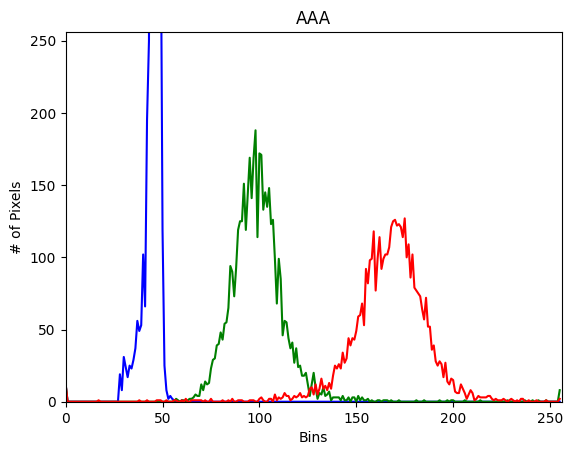

In [12]:
plot_histogram(working_region_image_green1, "AAA")

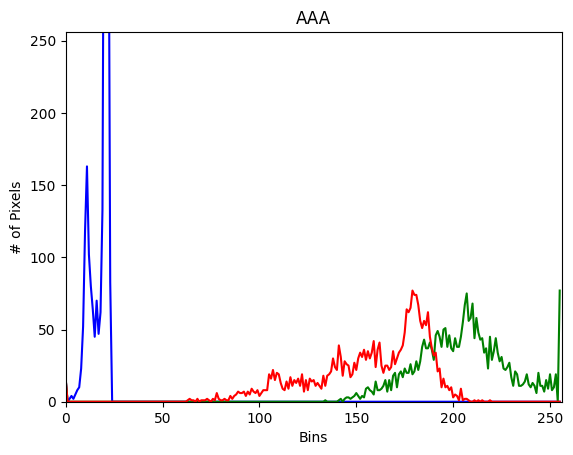

In [13]:
plot_histogram(working_region_image_green2, "AAA")

In [14]:
from utils.clustering import create_dataset, compute_color_histogram_dist_matrix

X = create_dataset(img_dir="./data", threshold=5)
dist_matrix = compute_color_histogram_dist_matrix(X)
dist_matrix.shape

Calculating similarities: 100%|██████████| 328/328 [00:00<00:00, 1351.13it/s]


(328, 328)

In [15]:
dist_matrix

array([[ 0.        ,  0.74965463,  0.74092723, ...,  0.72198584,
        17.04647529, 13.64196235],
       [ 0.74965463,  0.        ,  0.6215505 , ...,  0.60690333,
         0.82703752,  7.05851979],
       [ 0.74092723,  0.6215505 ,  0.        , ...,  0.10311202,
         0.79271264,  1.49986906],
       ...,
       [ 0.72198584,  0.60690333,  0.10311202, ...,  0.        ,
         0.46142933, 12.04480184],
       [17.04647529,  0.82703752,  0.79271264, ...,  0.46142933,
         0.        ,  8.04892642],
       [13.64196235,  7.05851979,  1.49986906, ..., 12.04480184,
         8.04892642,  0.        ]])

In [16]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10, metric="precomputed").fit(dist_matrix)
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 209


In [17]:
from utils.clustering import create_cluster_dirs

create_cluster_dirs(data_dir="./data", output_dir="clusters/colors", labels=labels)

Creating cluster dirs: 100%|██████████| 328/328 [00:00<00:00, 4511.99it/s]
